# Exploring Multiclass Classification on Fashion-MNIST Dataset



# Introduction




##Define the Task
### The problem domain

The problem and therefore goal is to automatically classify fashion items from images using deep learning. I will be using the Fashion - MNIST dataset and develop models using dense neural networks using sequential and dropout layers. I will tweak a minimum of 2 hyperparameters in order to achieve this and the tweaking will be done methodically based on the results of the models performance during training and testing.


As there are multiple classes the problem this focuses on is one of multi-classification and so I will be using categorical cross-entropy as the loss function to solve this problem and will be adhering to the DL universal workflow.


### The Dataset

Fashion-MNIST is a dataset, a collection of 70,000 greyscale images each 28x28 pixels. It is a balanced dataset as the images are equally distributed into 10 different classes. Within the 70,000 images, 10,000 images are used for testing and 60,000 used for training.


### Success

In order to measure success the model once trained will be evaluated by its results on correctly classifying unseen images into the correct category, with the metrics accuracy and loss used in part to evaluate this.



### Hypothesis


As such it can be hypothesized that the final model will achieve 90% accuracy on the test set and the dataset will be adequate to help achieve this.



### Importing tensorflow, numpy and matplotlib

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Helper Functions

I created them to speed up the process of plotting results of each individual model

In [2]:

# Helper Function to plot new models

def plot_model_results(results, model_name):


    plt.clf()

    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(model_name + ' Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    print(model_name + ': Min Training Loss: ', min(loss))
    print(model_name + ': Min Validation Loss: ', min(val_loss))



    plt.figure()

    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(model_name + ' Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    print(model_name + ': Max Training Acc: ', max(acc))
    print(model_name + ': Max Validation Acc: ', max(val_acc))




def compare_model_results(results1,results2,newest_model,prev_model):

    plt.clf()

    val_loss_new = results1.history['val_loss']
    val_loss_prev = results2.history['val_loss']

    epochs = range(1, len(val_loss_new) + 1)

    plt.plot(epochs, val_loss_prev, 'b+', label=prev_model)
    plt.plot(epochs, val_loss_new, 'bo', label=newest_model)
    plt.title(newest_model + ' Vs ' + prev_model)
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.legend()

    print(newest_model + ': Min Validation Loss: ', min(val_loss_new))
    print(prev_model + ': Min Validation Loss: ', min(val_loss_prev))




    plt.figure()

    val_acc_new = results1.history['val_accuracy']
    val_acc_prev = results2.history['val_accuracy']

    plt.plot(epochs, val_acc_prev, 'b+', label=prev_model)
    plt.plot(epochs, val_acc_new, 'bo', label=newest_model)
    plt.title(newest_model + ' Vs ' + prev_model)
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()

    plt.show()

    print(newest_model + ': Max Validation Acc: ', max(val_acc_new))
    print(prev_model + ': Max Validation Acc: ', max(val_acc_prev))



# Methodology

# 2.Develop a Model


### What is the common sense baseline?

As the dataset is balanced and has an equal number of images to category. This means the baseline accuracy the model should have is 10%. This is the probability of the model correctly predicting the category for an image by chance, which is a 1 in 10 chance for the model for each prediction.

This serves as a benchmark for the model and a target for the model to improve its accuracy higher than 10%.


### Load the Data

The Fashion MNIST dataset, containing images & labels is loaded before pre-processing




In [3]:
#Load Fashion MNIST Dataset - images & labels.

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


### Understanding the Dataset

This shows us an example of the data we are working with and the associated labels. Looking at this one example within the dataset,the image is shown to be an ankle boot as described by its label. The rest of the images within this dataset will belong to one of these 10 categories.


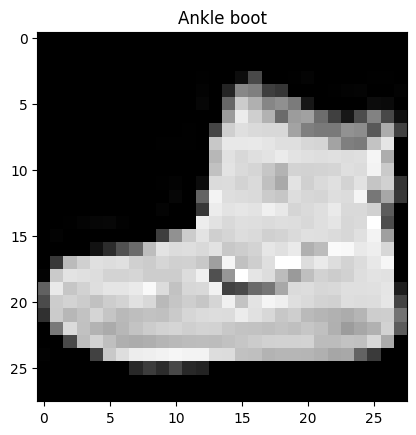

In [4]:
categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.imshow(train_images[0], cmap='gray')  # Display the image
plt.title(categories[train_labels[0]])  # Label the image according to its index category
plt.show()




### Prepare the Data

The pre-processing of the images from the Fashion MNIST dataset are are normalized by the pixel values being divided by 255, this allows them to be input into the network

In [5]:
#Pre-processing the data

#Converting the images to values between 0 and 1

train_images = train_images / 255.0
test_images = test_images / 255.0

#Flatten the 2D images into a 1D vector

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))


# Splitting the training set into partial train and validation sets

I will be splitting the training data into a partial training set of 48,000 which will be used to train the model and a validation set of 12,000 which will be used to evaluate the models performance. This is justified as the dataset is fairly large.



In [6]:
# Splitting the training data into train and evaluation

x_train_partial = train_images[12000:]
y_train_partial = train_labels[12000:]

x_val = train_images[:12000]
y_val = train_labels[:12000]

#Model 1

### Building the first model




This first model achieves statistical power as it beats the common sense baseline of 10% accuracy. As shown the model achieves a training accuracy of 0.94 and a validation accuracy of 0.89.

There isn't evidence of overfitting as there is no major deterioration in validation accuracy or increase in validation loss.

Epoch 1/25
375/375 [==============================] - 6s 15ms/step - loss: 0.5929 - accuracy: 0.7931 - val_loss: 0.4538 - val_accuracy: 0.8363
Epoch 2/25
375/375 [==============================] - 6s 15ms/step - loss: 0.4142 - accuracy: 0.8517 - val_loss: 0.3818 - val_accuracy: 0.8656
Epoch 3/25
375/375 [==============================] - 5s 12ms/step - loss: 0.3638 - accuracy: 0.8679 - val_loss: 0.3579 - val_accuracy: 0.8685
Epoch 4/25
375/375 [==============================] - 4s 10ms/step - loss: 0.3362 - accuracy: 0.8772 - val_loss: 0.3662 - val_accuracy: 0.8643
Epoch 5/25
375/375 [==============================] - 4s 10ms/step - loss: 0.3131 - accuracy: 0.8856 - val_loss: 0.3164 - val_accuracy: 0.8873
Epoch 6/25
375/375 [==============================] - 2s 6ms/step - loss: 0.2967 - accuracy: 0.8897 - val_loss: 0.3557 - val_accuracy: 0.8713
Epoch 7/25
375/375 [==============================] - 2s 6ms/step - loss: 0.2822 - accuracy: 0.8976 - val_loss: 0.3018 - val_accuracy: 0.8907
E

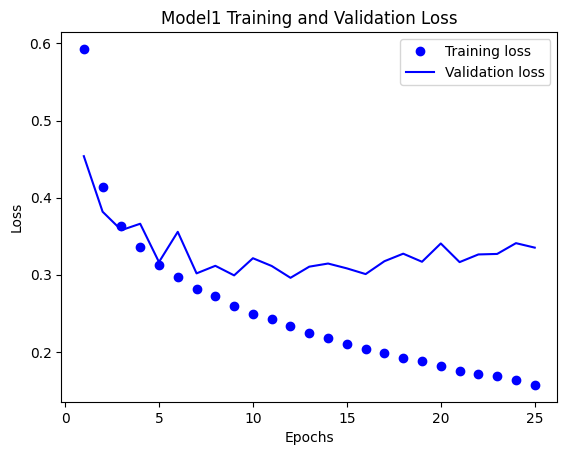

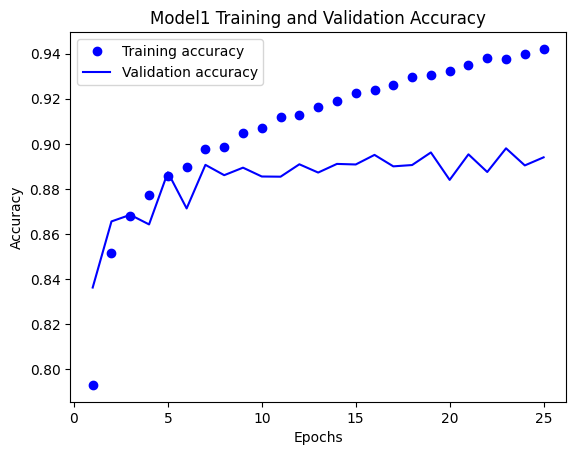

Model1: Max Training Acc:  0.9420833587646484
Model1: Max Validation Acc:  0.8980000019073486


In [7]:
# Building the Network


# Model 1
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28, )))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# using sparse_categorical_crossentropy which means there is no need for one hot vectors in these models.


# Training Model 1

model1_history = model.fit(
                           x_train_partial,
                           y_train_partial,
                           epochs=25,
                           batch_size=128,
                           validation_data=(x_val,
                           y_val))


# Results for Model 1

plot_model_results(model1_history, 'Model1')

# Model 2


### Scaling up - develop an overfitting model

As it is not obvious of a optimal epoch for this model, In order to develop a model that overfits I will increase the epoch of this model to 50 so I can then regulularize and tune the model.






Epoch 1/50
375/375 [==============================] - 3s 7ms/step - loss: 0.5938 - accuracy: 0.7917 - val_loss: 0.4317 - val_accuracy: 0.8472
Epoch 2/50
375/375 [==============================] - 2s 6ms/step - loss: 0.4171 - accuracy: 0.8500 - val_loss: 0.3958 - val_accuracy: 0.8574
Epoch 3/50
375/375 [==============================] - 3s 7ms/step - loss: 0.3690 - accuracy: 0.8673 - val_loss: 0.3398 - val_accuracy: 0.8752
Epoch 4/50
375/375 [==============================] - 3s 9ms/step - loss: 0.3373 - accuracy: 0.8775 - val_loss: 0.3818 - val_accuracy: 0.8557
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 0.3165 - accuracy: 0.8842 - val_loss: 0.3215 - val_accuracy: 0.8801
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 0.2993 - accuracy: 0.8910 - val_loss: 0.3151 - val_accuracy: 0.8825
Epoch 7/50
375/375 [==============================] - 2s 6ms/step - loss: 0.2843 - accuracy: 0.8953 - val_loss: 0.3332 - val_accuracy: 0.8792
Epoch 

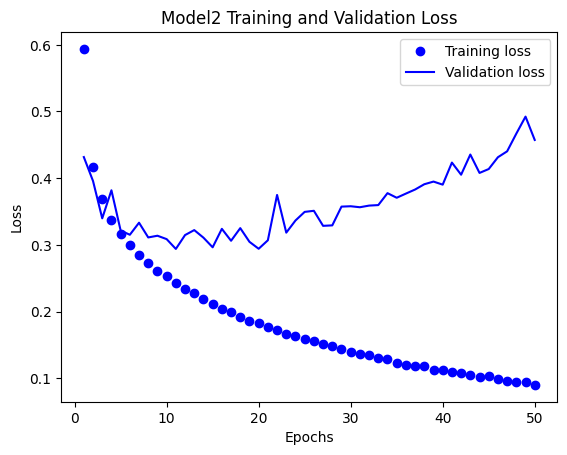

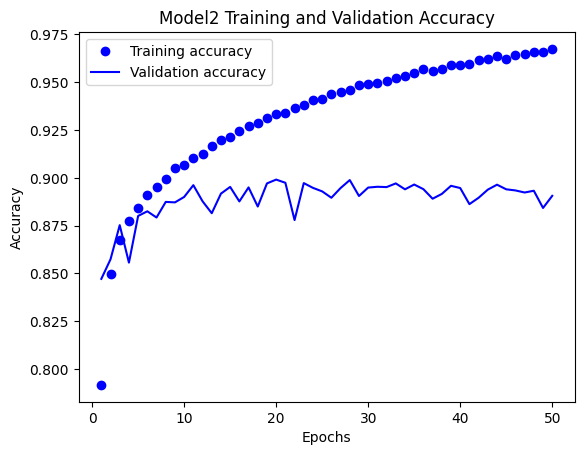

Model2: Max Training Acc:  0.9674166440963745
Model2: Max Validation Acc:  0.8990833163261414


In [11]:

# Model 2
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28, )))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



epoch_number = 50
batch_sz = 128

# Training Model 2

model2_history = model.fit(x_train_partial, y_train_partial, epochs=epoch_number, batch_size=batch_sz, validation_data=(x_val, y_val))



# Results for Model 2

plot_model_results(model2_history,'Model2')




As shown by the model plot, the model is now showing signs of overfitting due to the increase of number of epochs. This is shown by a steady increase in the validation loss of the model, I will now regularize and tune the model to decrease overfitting.

# Model 3

###Increasing the number of neurons to 512 units

Increasing the number of neurons has shown an increase in validation accuracy but a very small decrease in validation loss compared with Model 2. Overall as there is little to no change in model performance and the potential computational cost associated with an increased number of neurons is evidence that an increase in the number of neurons will not be considered a permanent change to the model.


Epoch 1/50
375/375 [==============================] - 4s 10ms/step - loss: 0.5921 - accuracy: 0.7902 - val_loss: 0.4840 - val_accuracy: 0.8331
Epoch 2/50
375/375 [==============================] - 4s 10ms/step - loss: 0.4049 - accuracy: 0.8529 - val_loss: 0.4751 - val_accuracy: 0.8359
Epoch 3/50
375/375 [==============================] - 5s 14ms/step - loss: 0.3554 - accuracy: 0.8692 - val_loss: 0.3353 - val_accuracy: 0.8757
Epoch 4/50
375/375 [==============================] - 3s 9ms/step - loss: 0.3250 - accuracy: 0.8788 - val_loss: 0.3424 - val_accuracy: 0.8725
Epoch 5/50
375/375 [==============================] - 4s 10ms/step - loss: 0.3066 - accuracy: 0.8876 - val_loss: 0.3290 - val_accuracy: 0.8783
Epoch 6/50
375/375 [==============================] - 5s 12ms/step - loss: 0.2873 - accuracy: 0.8930 - val_loss: 0.3209 - val_accuracy: 0.8854
Epoch 7/50
375/375 [==============================] - 4s 11ms/step - loss: 0.2767 - accuracy: 0.8982 - val_loss: 0.3397 - val_accuracy: 0.8799


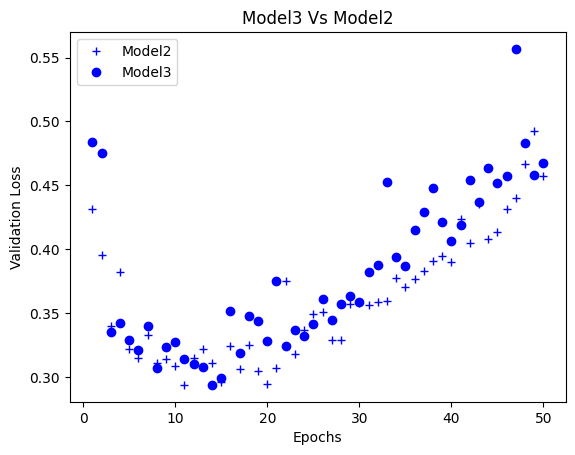

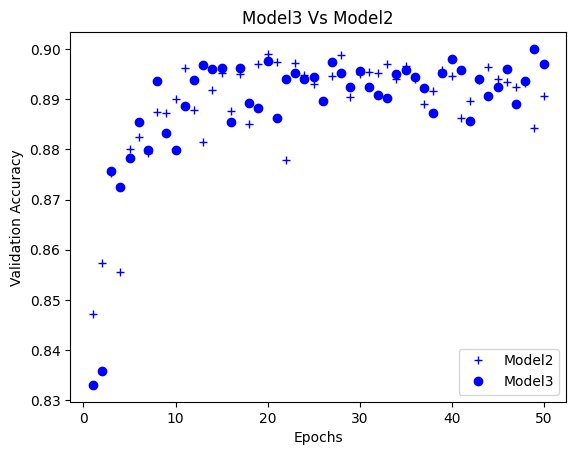

Model3: Max Validation Acc:  0.8999999761581421
Model2: Max Validation Acc:  0.8990833163261414


In [12]:
# Model 3
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28, )))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



epoch_number = 50
batch_sz = 128

# Results Model 3

model3_history = model.fit(x_train_partial, y_train_partial, epochs=epoch_number, batch_size=batch_sz, validation_data=(x_val, y_val))

compare_model_results(model3_history,model2_history,'Model3','Model2')



# Model 4


### Decreasing the number of neurons to 128 units

Although an increase in neurons won't be added to future models, I will halve the original number of neurons, so there will be 128 neurons in our first layer of the model to see any impact on performance.


Although validation accuracy remains at a similar rate and there is insignificant change with the accuracy. It is beneficial for the model to have fewer neurons because of the decrease in validation loss for model 4 compared against model 2.Therefore going forward the models will be trained on 128 neurons instead of 256.


Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.6067 - accuracy: 0.7888 - val_loss: 0.4603 - val_accuracy: 0.8339
Epoch 2/50
375/375 [==============================] - 2s 4ms/step - loss: 0.4312 - accuracy: 0.8463 - val_loss: 0.3859 - val_accuracy: 0.8655
Epoch 3/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3847 - accuracy: 0.8617 - val_loss: 0.3727 - val_accuracy: 0.8672
Epoch 4/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3551 - accuracy: 0.8712 - val_loss: 0.3535 - val_accuracy: 0.8690
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3338 - accuracy: 0.8791 - val_loss: 0.3485 - val_accuracy: 0.8767
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3163 - accuracy: 0.8845 - val_loss: 0.3286 - val_accuracy: 0.8823
Epoch 7/50
375/375 [==============================] - 2s 6ms/step - loss: 0.3018 - accuracy: 0.8896 - val_loss: 0.3178 - val_accuracy: 0.8855
Epoch 

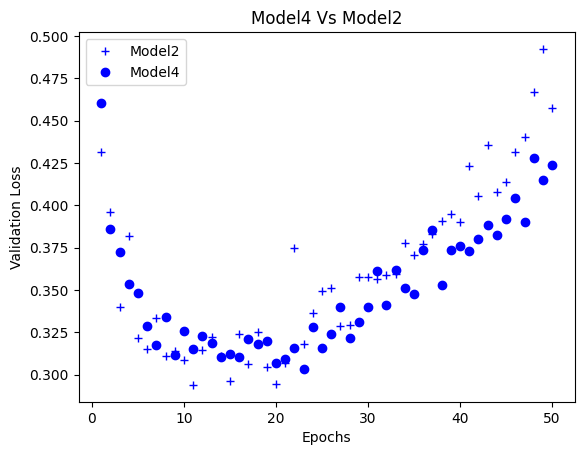

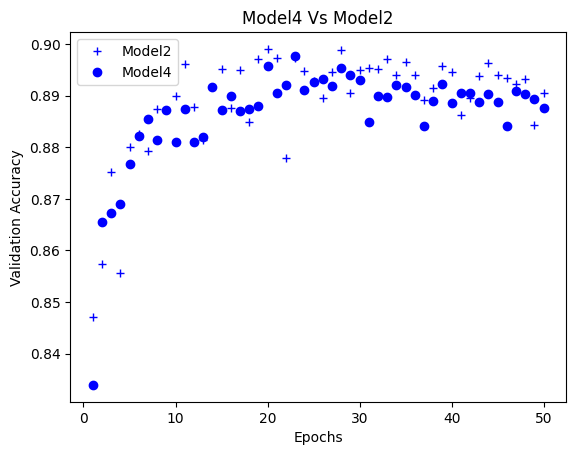

Model4: Max Validation Acc:  0.8976666927337646
Model2: Max Validation Acc:  0.8990833163261414


In [13]:
# Model 4 - Less neurons


model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28, )))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



epoch_number = 50
batch_sz = 128


# Training Model 4

model4_history = model.fit(x_train_partial, y_train_partial, epochs=epoch_number, batch_size=batch_sz, validation_data=(x_val, y_val))


# Results

compare_model_results(model4_history,model2_history,'Model4','Model2')


# Model 5

### Adding another Layer


Validation loss increases around epoch 20 onwards and increases to a max value of 0.58. Therefore it is clear that the validation loss has increased as a result of adding more layers and so the model is now overfitting. I will ensure that the number of layers in the model will remain at 2 and will not be increasing because of this.


Epoch 1/50
375/375 [==============================] - 3s 6ms/step - loss: 0.5914 - accuracy: 0.7904 - val_loss: 0.4611 - val_accuracy: 0.8313
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4109 - accuracy: 0.8507 - val_loss: 0.4054 - val_accuracy: 0.8507
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3631 - accuracy: 0.8669 - val_loss: 0.4089 - val_accuracy: 0.8485
Epoch 4/50
375/375 [==============================] - 2s 6ms/step - loss: 0.3353 - accuracy: 0.8755 - val_loss: 0.3491 - val_accuracy: 0.8741
Epoch 5/50
375/375 [==============================] - 3s 9ms/step - loss: 0.3138 - accuracy: 0.8839 - val_loss: 0.3372 - val_accuracy: 0.8763
Epoch 6/50
375/375 [==============================] - 2s 5ms/step - loss: 0.2962 - accuracy: 0.8901 - val_loss: 0.3221 - val_accuracy: 0.8814
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.2819 - accuracy: 0.8953 - val_loss: 0.3143 - val_accuracy: 0.8851
Epoch 

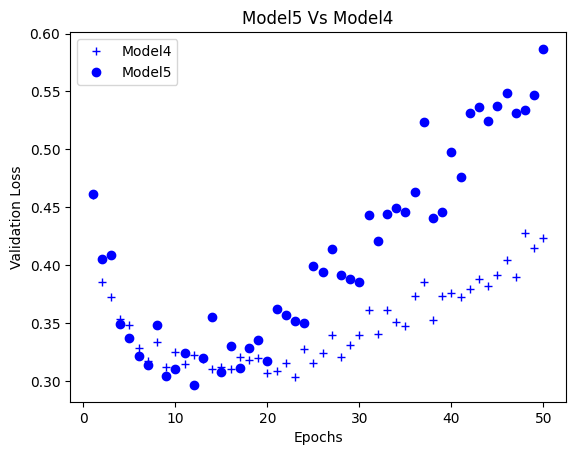

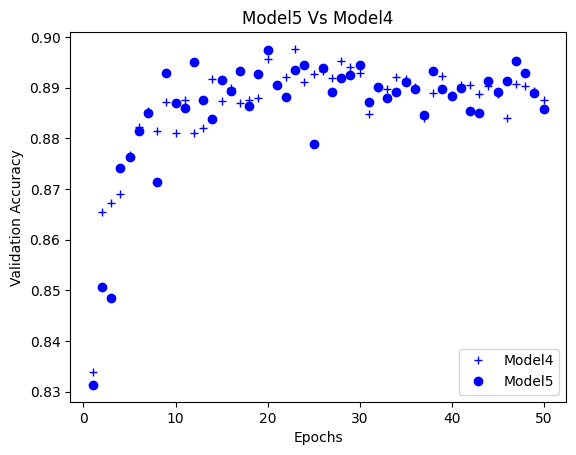

Model5: Max Validation Acc:  0.8974999785423279
Model4: Max Validation Acc:  0.8976666927337646


In [14]:
# # Model 5 - Adding a Layer (3 Total Layers)


model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28, )))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



epoch_number = 50
batch_sz = 128

# # Training Model 5


# # Results for Model 5

model5_history = model.fit(x_train_partial, y_train_partial, epochs=epoch_number, batch_size=batch_sz, validation_data=(x_val, y_val))


compare_model_results(model5_history,model4_history,'Model5','Model4')

# Model 6

### Adding dropout layer of 0.5


Adding a dropout layer of 0.5 doesn't have a significant impact on the models performance, the minimum validation loss for model 4 being 0.30 and for model 6 is 0.32. The validation loss does increase very slightly around 40 epochs for model 4 , however as this is slight and the validation accuracy is very similar for model 4 and model 6. The dropout layer of 0.5 will not be added to further models as the impact on model performance is minimal.


Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.7125 - accuracy: 0.7502 - val_loss: 0.4605 - val_accuracy: 0.8369
Epoch 2/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4962 - accuracy: 0.8248 - val_loss: 0.4083 - val_accuracy: 0.8526
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4486 - accuracy: 0.8389 - val_loss: 0.3945 - val_accuracy: 0.8527
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.4268 - accuracy: 0.8473 - val_loss: 0.3598 - val_accuracy: 0.8717
Epoch 5/50
375/375 [==============================] - 3s 8ms/step - loss: 0.4150 - accuracy: 0.8518 - val_loss: 0.3587 - val_accuracy: 0.8698
Epoch 6/50
375/375 [==============================] - 2s 6ms/step - loss: 0.3971 - accuracy: 0.8570 - val_loss: 0.3548 - val_accuracy: 0.8711
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3927 - accuracy: 0.8588 - val_loss: 0.3462 - val_accuracy: 0.8772
Epoch 

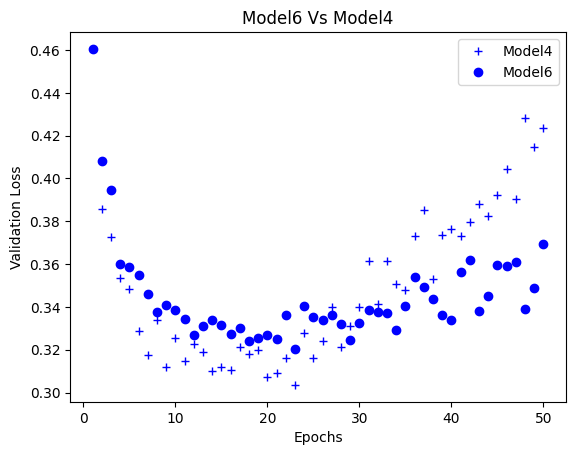

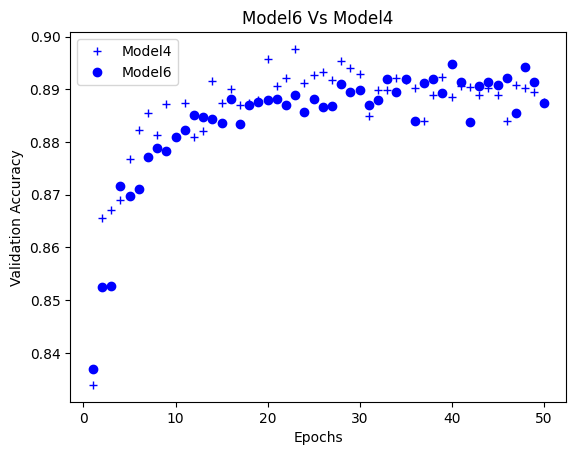

Model6: Max Validation Acc:  0.8948333263397217
Model4: Max Validation Acc:  0.8976666927337646


In [15]:

# # Model 6 - Dropout

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28, )))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


epoch_number = 50
batch_sz = 128


# # Training Model 6

# # Results for Model 6

model6_history = model.fit(x_train_partial, y_train_partial, epochs=epoch_number, batch_size=batch_sz, validation_data=(x_val, y_val))

compare_model_results(model6_history,model4_history,'Model6','Model4')


# Model 7

### Adding dropout layer of 0.2

As the dropout layer of 0.5 didn't have much impact on the models performance, I decided to decrease it to 0.2

The validation loss is very similar on both models however towards higher epochs the validation loss is higher for model 4, the maximum validation accuracy for both models is identical at 0.896. Therefore having a dropout layer of 0.2 does have a small positive impact on the models performance and so the final model will include this dropout layer.


Epoch 1/50
375/375 [==============================] - 3s 6ms/step - loss: 0.6447 - accuracy: 0.7775 - val_loss: 0.4633 - val_accuracy: 0.8343
Epoch 2/50
375/375 [==============================] - 3s 8ms/step - loss: 0.4511 - accuracy: 0.8416 - val_loss: 0.4036 - val_accuracy: 0.8579
Epoch 3/50
375/375 [==============================] - 2s 6ms/step - loss: 0.3995 - accuracy: 0.8558 - val_loss: 0.3594 - val_accuracy: 0.8702
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3721 - accuracy: 0.8649 - val_loss: 0.3460 - val_accuracy: 0.8726
Epoch 5/50
375/375 [==============================] - 2s 6ms/step - loss: 0.3534 - accuracy: 0.8708 - val_loss: 0.3369 - val_accuracy: 0.8763
Epoch 6/50
375/375 [==============================] - 2s 4ms/step - loss: 0.3378 - accuracy: 0.8776 - val_loss: 0.3262 - val_accuracy: 0.8817
Epoch 7/50
375/375 [==============================] - 2s 5ms/step - loss: 0.3243 - accuracy: 0.8828 - val_loss: 0.3293 - val_accuracy: 0.8806
Epoch 

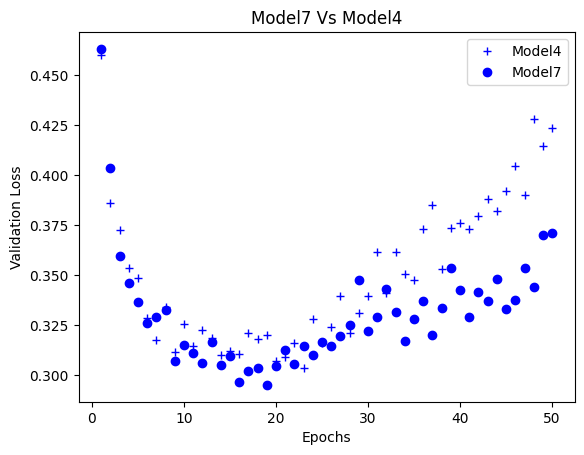

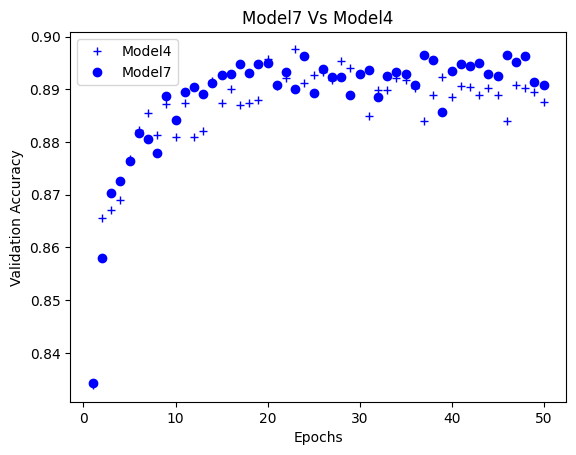

Model7: Max Validation Acc:  0.8965833187103271
Model4: Max Validation Acc:  0.8976666927337646


In [16]:


# # # Model 7 - Lower dropout rate

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28, )))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



epoch_number = 50
batch_sz = 128


# # # Training Model 7

model7_history = model.fit(x_train_partial, y_train_partial, epochs=epoch_number, batch_size=batch_sz, validation_data=(x_val, y_val))


# # Results for Model 7

compare_model_results(model7_history,model4_history,'Model7','Model4')


# Results

### Model 8

Based on the findings of the investigation, It's clear that some modifications to the original model were required in order to reduce overfitting and improve performance of the original model.

These were:

- Adding a dropout layer of 0.2
- Decreasing the number of neurons to 128 units


After finalizing the model, I trained the final model on the whole training set allowing the model to learn. I then evaluated the model using the test set which is unseen data, similar to a real world application of the model and so provides an unbiased result and accuracy of the model.


Epoch 1/50
469/469 [==============================] - 4s 7ms/step - loss: 0.6188 - accuracy: 0.7840
Epoch 2/50
469/469 [==============================] - 2s 5ms/step - loss: 0.4289 - accuracy: 0.8468
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3862 - accuracy: 0.8601
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3616 - accuracy: 0.8697
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3440 - accuracy: 0.8735
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3311 - accuracy: 0.8799
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3205 - accuracy: 0.8833
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3104 - accuracy: 0.8865
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3035 - accuracy: 0.8906
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2953 - accuracy: 0.8918

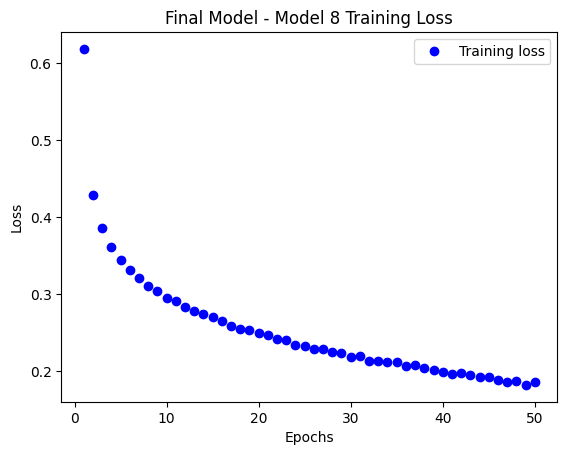

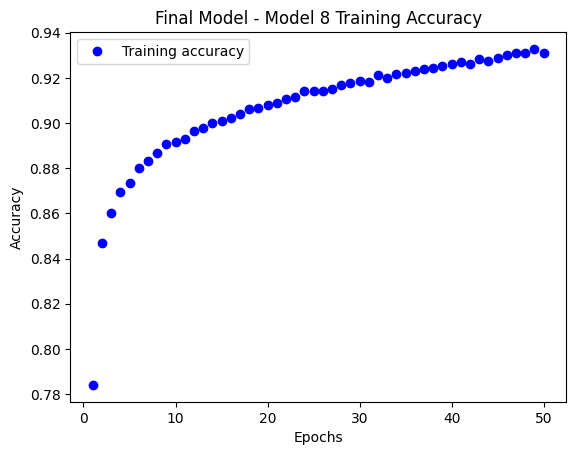

Final Model - Model 8: Max Training Acc:  0.9328166842460632
313/313 [==============================] - 1s 3ms/step - loss: 0.3810 - accuracy: 0.8851


[0.38097357749938965, 0.8851000070571899]

In [22]:



# Final Model

# Model 8


model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(28*28, )))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


batch_sz = 128



model8_history = model.fit(train_images,train_labels,epochs=50,batch_size=batch_sz)



loss = model8_history.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Final Model - Model 8' + ' Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

print('Final Model - Model 8' + ': Min Training Loss: ', min(loss))



plt.figure()

acc = model8_history.history['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.title('Final Model - Model 8' + ' Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

print('Final Model - Model 8' + ': Max Training Acc: ', max(acc))


model.evaluate(test_images,test_labels)



# Conclusion

The final model produced from this investigation contained a dropout layer of 0.2, units of 128, reduced from the original amount of 256. Although other hyperparameters were tweaked during the development of the different models, for example adjusting the amount of layers, the number of epochs. The most positive impacts were introducing the dropout layer and reducing the number of units in the model as these proved to be the best at reducing overfitting and improving model performance. It is also noted that due to this particular dataset there is not a specific optimal epoch and so in order to see the opportunity to prevent overfitting an epoch of 50 was used throughout development of the models.

The final model results were impressive, an 88% accuracy on the unseen test data surpasses the baseline model of 10% accuracy by a considerable margin. Although the model didn't reach the hypothesized goal of 90% accuracy, this is still considered to be a good achievement. The model also achieved a training loss of 35% on the test data which can be considered to be a fair result and shows that the model has a good balance between the two metrics.

In conclusion, the hypothesis was mostly reached as the model's accuracy was very high on the test data and this was allowed to happen by the fact the dataset was adequate to train the model. The results from this investigation shows the
potential for deep learning models and their successful application in being used for solving multi classification problems.



